# Comparison of Object Type Distribution

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# this function returns pandas dataframe from the TESS spread sheet
def read_tess(sheetName):
    TESS = pd.ExcelFile('TESSRechecks_ALLDATA.xlsx')
    sheet = pd.read_excel(TESS, sheetName)
    sheet = sheet[['WISEID',
                   'Amplitude mmags',
                   'Overall assessment: PV, QPV, IV, LAQV, LAIV, NV']]
    sheet = sheet.rename(columns={'Amplitude mmags': 'Amplitude',
                                  'Overall assessment: PV, QPV, IV, LAQV, LAIV, NV': 'Assessment'})
    return sheet

In [9]:
def create_pie(df):
    labels = 'PV', 'QPV', 'IV', 'LAQV', 'NV'
    if 'PV' in df.Assessment:
        PV = df.Assessment.value_counts().PV
        QPV = df.Assessment.value_counts().QPV
        IV = df.Assessment.value_counts().IV
        LAQV = df.Assessment.value_counts().LAQV
        NV = df.Assessment.value_counts().NV
        freq = [PV, QPV, IV, LAQV, NV]

        fig, ax = plt.subplots()
        ax.pie(freq, labels=labels, autopct='%1.1f%%',
               startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

        plt.show()
    else:
        QPV = df.Assessment.value_counts().QPV
        IV = df.Assessment.value_counts().IV
        LAQV = df.Assessment.value_counts().LAQV
        NV = df.Assessment.value_counts().NV
        freq = [QPV, IV, LAQV, NV]

        fig, ax = plt.subplots()
        ax.pie(freq, labels=labels, autopct='%1.1f%%',
               startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

        plt.show()

In [14]:
# obtain the dataframes by reading from specific sheets
print(np.shape(read_tess('YSOE+YSOM')))
YSO = read_tess('YSOE+YSOM').dropna()
print(np.shape(YSO))
print(np.shape(read_tess('ExtremeDebrisDisk')))
EDD = read_tess('ExtremeDebrisDisk').dropna()
print(np.shape(EDD))

(67, 3)
(61, 3)
(29, 3)
(24, 3)


In [46]:
# replace LAIV in the 'Assessment' column with NV
YSO.loc[YSO['Assessment'] == 'LAIV', 'Assessment'] = 'NV'
EDD.loc[EDD['Assessment'] == 'LAIV', 'Assessment'] = 'NV'

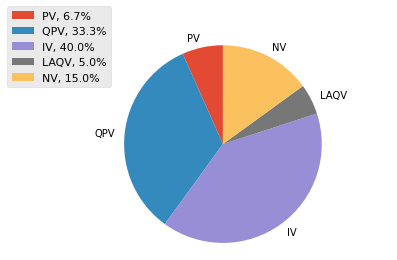

In [92]:
labels = 'PV', 'QPV', 'IV', 'LAQV', 'NV'
PV = YSO.Assessment.value_counts().PV
QPV = YSO.Assessment.value_counts().QPV
IV = YSO.Assessment.value_counts().IV
LAQV = YSO.Assessment.value_counts().LAQV
NV = YSO.Assessment.value_counts().NV
freq = [PV, QPV, IV, LAQV, NV]

fig, ax = plt.subplots()
ax.pie(freq, labels=labels, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
total = sum(freq)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, freq)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig.transFigure
)
plt.savefig('YSODistribution.png')
plt.show()

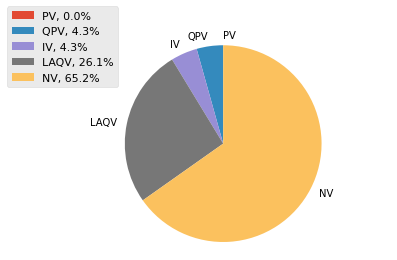

In [93]:
labels = 'PV', 'QPV', 'IV', 'LAQV', 'NV'
PV = 0
QPV = EDD.Assessment.value_counts().QPV
IV = EDD.Assessment.value_counts().IV
LAQV = EDD.Assessment.value_counts().LAQV
NV = EDD.Assessment.value_counts().NV
freq = [PV, QPV, IV, LAQV, NV]

fig, ax = plt.subplots()
ax.pie(freq, labels=labels, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
total = sum(freq)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, freq)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig.transFigure
)
plt.savefig('EDDDistribution.png')
plt.show()